# Import

In [1]:
import numpy as np
import cv2
from operator import itemgetter
from matplotlib import pyplot as plt

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('Models/haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('Models/haarcascade_eye.xml')

# Preview

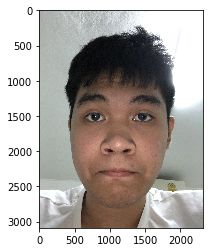

True

In [2]:
loadrawimage = cv2.imread("Input/IMG_8863.jpeg")
#imp is RGB-image in shape(,,3).

img= np.zeros((loadrawimage.shape[0],loadrawimage.shape[1],4))
img[:,:,:3]=loadrawimage
img[:,:,3]=255
#Make a copy for fourth dimention tranparent.

binary = (img[:,:,0]+img[:,:,1]+img[:,:,2]<150)
#Make binary image.

blue_eyes=cv2.imread("Models/avatar-eyes-png-3-transparent.png",cv2.IMREAD_UNCHANGED)
#Load blue_eyes picture.

gray = cv2.cvtColor(loadrawimage, cv2.COLOR_BGR2GRAY)
#Make gray image for detection.
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Detected faces.

for (x,y,w,h) in faces:
    #In each face.
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    #Get image of this face.
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #Detected eyes in face.
    eyes=sorted(eyes, key=itemgetter(2),reverse = True)
    #Sorted eyes in face by size big to small.
    
    count_eyes=0
    #Make counter eyes for only first 2 bigest eyes. 
    #Avoid unexpected detection of eyes.
    for (ex,ey,ew,eh) in eyes:
        #In each eye.
        count_eyes=count_eyes+1
        countbi=0
        sumx=0
        sumy=0
        for bix in range(ex+x,ex+x+ew):
            for biy in range(ey+y,ey+y+eh):
                if(binary[biy,bix]):
                    #If this pixel black which meant to be eye.
                    countbi=countbi+1
                    sumx=sumx+bix
                    sumy=sumy+biy
        #Get the centre location of eye
        sumx=int((sumx/countbi)-(0.225*ew))
        sumy=int((sumy/countbi)-(0.225*eh))
        
        #Resize blue_eyes for eye.
        blue_eyes=cv2.resize(blue_eyes, (int(ew*0.45),int(eh*0.45)), interpolation = cv2.INTER_AREA)
        
        #Add eyes to the photo.
        img[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45),:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]=(0.8*(img[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45),:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]))+(blue_eyes[:,:,:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]*0.2)
        if(count_eyes>=2):
            #If complete 2 eyes then break!
            break
            
#Show final image.
plt.imshow(cv2.cvtColor(img[:,:,:3].astype('float32')/255, cv2.COLOR_BGR2RGB,))
plt.show()
#Save Image
cv2.imwrite('IMG_8863.jpg',cv2.blur(img[:,:,:3],(7,7)))

# Process

Eye Number :  1


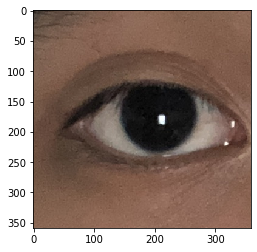

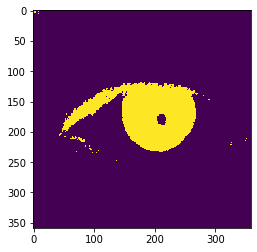

Eye after : 


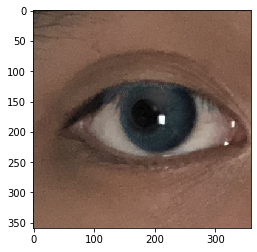

___________________________
Eye Number :  2


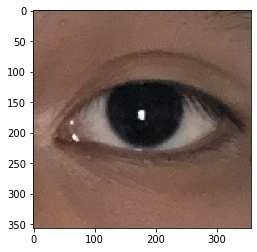

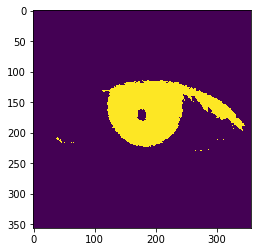

Eye after : 


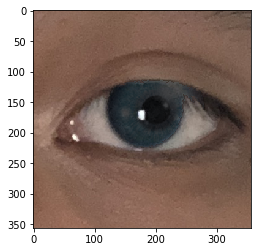

___________________________
Final : 


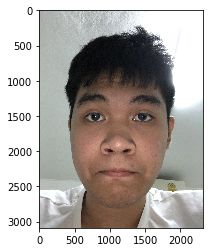

True

In [3]:
loadrawimage = cv2.imread("Input/IMG_8863.jpeg")
#imp is RGB-image in shape(,,3).

img= np.zeros((loadrawimage.shape[0],loadrawimage.shape[1],4))
img[:,:,:3]=loadrawimage
img[:,:,3]=255
#Make a copy for fourth dimention tranparent.

binary = (img[:,:,0]+img[:,:,1]+img[:,:,2]<150)
#Make binary image.

blue_eyes=cv2.imread("Models/avatar-eyes-png-3-transparent.png",cv2.IMREAD_UNCHANGED)
#Load blue_eyes picture.

gray = cv2.cvtColor(loadrawimage, cv2.COLOR_BGR2GRAY)
#Make gray image for detection.
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Detected faces.

for (x,y,w,h) in faces:
    #In each face.
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    #Get image of this face.
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #Detected eyes in face.
    eyes=sorted(eyes, key=itemgetter(2),reverse = True)
    #Sorted eyes in face by size big to small.
    
    count_eyes=0
    #Make counter eyes for only first 2 bigest eyes. 
    #Avoid unexpected detection of eyes.
    for (ex,ey,ew,eh) in eyes:
        #In each eye.
        count_eyes=count_eyes+1
        countbi=0
        sumx=0
        sumy=0
        
        print("Eye Number : ",count_eyes)
        plt.imshow(cv2.cvtColor(img[ey+y:ey+y+eh,ex+x:ex+x+ew,:3].astype('float32')/255, cv2.COLOR_BGR2RGB,))
        plt.show()
        plt.imshow(binary[ey+y:ey+y+eh,ex+x:ex+x+ew])
        plt.show()
        
        for bix in range(ex+x,ex+x+ew):
            for biy in range(ey+y,ey+y+eh):
                if(binary[biy,bix]):
                    #If this pixel black which meant to be eye.
                    countbi=countbi+1
                    sumx=sumx+bix
                    sumy=sumy+biy
        #Get the centre location of eye
        sumx=int((sumx/countbi)-(0.225*ew))
        sumy=int((sumy/countbi)-(0.225*eh))
        
        #Resize blue_eyes for eye.
        blue_eyes=cv2.resize(blue_eyes, (int(ew*0.45),int(eh*0.45)), interpolation = cv2.INTER_AREA)
        
        #Add eyes to the photo.
        img[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45),:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]=(0.8*(img[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45),:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]))+(blue_eyes[:,:,:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]*0.2)
        print("Eye after : ")
        plt.imshow(cv2.cvtColor(img[ey+y:ey+y+eh,ex+x:ex+x+ew,:3].astype('float32')/255, cv2.COLOR_BGR2RGB,))
        plt.show()
        print("___________________________")
        if(count_eyes>=2):
            #If complete 2 eyes then break!
            break
        
#Show final image.
print("Final : ")
plt.imshow(cv2.cvtColor(img[:,:,:3].astype('float32')/255, cv2.COLOR_BGR2RGB,))
plt.show()
#Save Image
cv2.imwrite('IMG_8863.jpg',cv2.blur(img[:,:,:3],(7,7)))

# Live view

In [ ]:
cap = cv2.VideoCapture(0)

blue_eyes=cv2.imread("Models/avatar-eyes-png-3-transparent.png",cv2.IMREAD_UNCHANGED)
#Load blue_eyes picture.

while 1:
    #Get webcam picture
    ret, loadrawimage = cap.read()
    
    img= np.zeros((loadrawimage.shape[0],loadrawimage.shape[1],4))
    img[:,:,:3]=loadrawimage
    img[:,:,3]=255
    binary = (img[:,:,0]+img[:,:,1]+img[:,:,2]<150)
    #Make binary image.
    
    plt.imshow(cv2.cvtColor(img[:,:,:3].astype('float32')/255, cv2.COLOR_BGR2RGB,))
    plt.show()
    
    gray = cv2.cvtColor(loadrawimage, cv2.COLOR_BGR2GRAY)
    #Make gray image for detection.
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #Detected faces.

    for (x,y,w,h) in faces:
        #In each face.

        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        #Get image of this face.

        eyes = eye_cascade.detectMultiScale(roi_gray)
        #Detected eyes in face.
        eyes=sorted(eyes, key=itemgetter(2),reverse = True)
        #Sorted eyes in face by size big to small.

        count_eyes=0
        #Make counter eyes for only first 2 bigest eyes. 
        #Avoid unexpected detection of eyes.
        for (ex,ey,ew,eh) in eyes:
            #In each eye.
            count_eyes=count_eyes+1
            countbi=0
            sumx=0
            sumy=0
            
#             print("ey :",ey)
#             print("y :",y)
#             print("eh :",eh)
#             print("ex :",ex)
#             print("x :",x)
#             print("ew :",ew)
            
            for bix in range(ex+x,ex+x+ew):
                for biy in range(ey+y,ey+y+eh):
                    #print(biy,bix,binary.shape)
                    if(binary[biy,bix]):
                        #If this pixel black which meant to be eye.
                        countbi=countbi+1
                        sumx=sumx+bix
                        sumy=sumy+biy
                        
            #Get the centre location of eye
            if(countbi>0):
                sumx=int((sumx/countbi)-(0.225*ew))
                sumy=int((sumy/countbi)-(0.225*eh))

            #Resize blue_eyes for eye.
            blue_eyes=cv2.resize(blue_eyes, (int(ew*0.45),int(eh*0.45)), interpolation = cv2.INTER_AREA)

            #Add eyes to the photo.
            img[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45),:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]=(0.8*(img[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45),:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]))+(blue_eyes[:,:,:][(blue_eyes[:,:,3]>0)&binary[sumy:sumy+int(eh*0.45),sumx:sumx+int(ew*0.45)]]*0.2)
            if(count_eyes>=2):
                #If complete 2 eyes then break!
                break

    cv2.imshow('img',img[:,:])
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()